In [15]:
import numpy as np
import pandas as pd


In [16]:
main_df = pd.read_csv('/content/drive/MyDrive/1073_shrt_chn_ poly/consolidated_cif_data.csv', low_memory=False)

In [17]:
main_df.head()

,filename,_symmetry_space_group_name_H-M,_cell_length_a,_cell_length_b,_cell_length_c,_cell_angle_alpha,_cell_angle_beta,_cell_angle_gamma,_symmetry_Int_Tables_number,_chemical_formula_structural,...,Sn58,Sn34,Sn67,Sn68,Sn71,Sn72,Sn107,Sn108,Sn3,Sn4
0,0001.cif,P 1,6.747487,8.144515,10.491788,90.002146,90.000840,96.884138,1,H10C6O5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0002.cif,P 1,11.281997,7.517361,16.461730,90.000000,115.674132,90.000000,1,HC,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0003.cif,P 1,6.191672,6.523301,18.920289,89.999948,89.996958,82.377080,1,H2C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0004.cif,P 1,4.358519,2.545160,8.417162,90.000000,100.194656,90.000000,1,HC2F3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0005.cif,P 1,7.282775,5.641056,7.835744,90.000000,90.000000,90.000000,1,H2C4S,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Identify elements

### Subtask:
Identify all unique elements present in the `main_df` dataframe.


In [18]:
import re

# List of valid chemical element symbols
valid_elements = ['H', 'He', 'Li', 'Be', 'B', 'C', 'N', 'O', 'F', 'Ne', 'Na', 'Mg', 'Al', 'Si', 'P', 'S', 'Cl', 'Ar', 'K', 'Ca', 'Sc', 'Ti', 'V', 'Cr', 'Mn', 'Fe', 'Co', 'Ni', 'Cu', 'Zn', 'Ga', 'Ge', 'As', 'Se', 'Br', 'Kr', 'Rb', 'Sr', 'Y', 'Zr', 'Nb', 'Mo', 'Tc', 'Ru', 'Rh', 'Pd', 'Ag', 'Cd', 'In', 'Sn', 'Sb', 'Te', 'I', 'Xe', 'Cs', 'Ba', 'La', 'Ce', 'Pr', 'Nd', 'Pm', 'Sm', 'Eu', 'Gd', 'Tb', 'Dy', 'Ho', 'Er', 'Tm', 'Yb', 'Lu', 'Hf', 'Ta', 'W', 'Re', 'Os', 'Ir', 'Pt', 'Au', 'Hg', 'Tl', 'Pb', 'Bi', 'Po', 'At', 'Rn', 'Fr', 'Ra', 'Ac', 'Th', 'Pa', 'U', 'Np', 'Pu', 'Am', 'Cm', 'Bk', 'Cf', 'Es', 'Fm', 'Md', 'No', 'Lr', 'Rf', 'Db', 'Sg', 'Bh', 'Hs', 'Mt', 'Ds', 'Rg', 'Cn', 'Nh', 'Fl', 'Mc', 'Lv', 'Ts', 'Og']

column_names = main_df.columns
unique_elements = []

for col in column_names:
    # Use regex to extract potential element symbols
    match = re.match(r'^([A-Z][a-z]?)', col)
    if match:
        element = match.group(1)
        # Check if the extracted symbol is a valid element and not already in our list
        if element in valid_elements and element not in unique_elements:
            unique_elements.append(element)

print(unique_elements)

['Cl', 'La', 'At', 'Ba', 'C', 'H', 'O', 'F', 'S', 'N', 'Sn', 'Ti', 'Ca', 'Al', 'Zn', 'Mg', 'Zr', 'Hf', 'Cd', 'Pb']


In [19]:
trial_df = main_df.iloc[:, 10:26]

In [20]:
trial_df.head()

,_chemical_formula_sum,_cell_volume,_cell_formula_units_Z,Source,Class,Label,Structure prediction method used,Number of atoms,Number of atom types,Atom types,"Dielectric constant, electronic","Dielectric constant, ionic","Dielectric constant, total",Band gap at the GGA level (eV),Band gap at the HSE06 level (eV),Atomization energy (eV/atom)
0,H40 C24 O20,572.419498,4,Zhu_etal:J.Chem.Phys.141.154102(2014),common_polymer_crystal,cellulose,NaN,84,3,C H O,2.84888,0.933221,3.78210,5.6194,7.4757,-5.47556
1,H64 C64,1258.296758,64,DeRosa_etal:Macromolecules.30.4147(1997),common_polymer_crystal,clath-syndio-polystyrene,NaN,128,2,C H,2.63870,0.077230,2.71593,3.9390,4.8255,-5.89814
2,H72 C36,757.439662,36,Hikosaka-Seto:PolymerJ.5.111(1973),common_polymer_crystal,isotactic_propylene,NaN,108,2,C H,2.59178,0.000000,2.59178,6.2842,7.6675,-5.14330
3,H2 C4 F6,91.898501,2,Kolda-Lando:J.Macromol.Sci.Phys.B11.21(1975),common_polymer_crystal,p-112-trifluoroethene,NaN,12,3,C F H,2.49522,0.581072,3.07630,4.7895,6.8451,-5.11219
4,H8 C16 S4,321.912297,4,Kobayashi_etal:Synth.Met.9.77(1984),common_polymer_crystal,p-25-dihydrothiophene-25-diyl,NaN,28,3,S C H,7.04381,0.146905,7.19072,0.5666,0.9894,-6.17903


In [21]:
tr1_df = trial_df.drop(trial_df.columns[1:4], axis=1)

In [22]:
tr1_df.head()


,_chemical_formula_sum,Class,Label,Structure prediction method used,Number of atoms,Number of atom types,Atom types,"Dielectric constant, electronic","Dielectric constant, ionic","Dielectric constant, total",Band gap at the GGA level (eV),Band gap at the HSE06 level (eV),Atomization energy (eV/atom)
0,H40 C24 O20,common_polymer_crystal,cellulose,NaN,84,3,C H O,2.84888,0.933221,3.78210,5.6194,7.4757,-5.47556
1,H64 C64,common_polymer_crystal,clath-syndio-polystyrene,NaN,128,2,C H,2.63870,0.077230,2.71593,3.9390,4.8255,-5.89814
2,H72 C36,common_polymer_crystal,isotactic_propylene,NaN,108,2,C H,2.59178,0.000000,2.59178,6.2842,7.6675,-5.14330
3,H2 C4 F6,common_polymer_crystal,p-112-trifluoroethene,NaN,12,3,C F H,2.49522,0.581072,3.07630,4.7895,6.8451,-5.11219
4,H8 C16 S4,common_polymer_crystal,p-25-dihydrothiophene-25-diyl,NaN,28,3,S C H,7.04381,0.146905,7.19072,0.5666,0.9894,-6.17903


In [23]:
tr2_df = tr1_df.drop(tr1_df.columns[[1,2,3,6]], axis=1)
tr2_df.head()

,_chemical_formula_sum,Number of atoms,Number of atom types,"Dielectric constant, electronic","Dielectric constant, ionic","Dielectric constant, total",Band gap at the GGA level (eV),Band gap at the HSE06 level (eV),Atomization energy (eV/atom)
0,H40 C24 O20,84,3,2.84888,0.933221,3.78210,5.6194,7.4757,-5.47556
1,H64 C64,128,2,2.63870,0.077230,2.71593,3.9390,4.8255,-5.89814
2,H72 C36,108,2,2.59178,0.000000,2.59178,6.2842,7.6675,-5.14330
3,H2 C4 F6,12,3,2.49522,0.581072,3.07630,4.7895,6.8451,-5.11219
4,H8 C16 S4,28,3,7.04381,0.146905,7.19072,0.5666,0.9894,-6.17903


In [24]:
halogen = ['Cl', 'F']
Others = ['At', 'C', 'H', 'O', 'S', 'N']
metals = ['La', 'Ba', 'Sn', 'Ti', 'Ca', 'Al', 'Zn', 'Mg', 'Zr', 'Hf', 'Cd', 'Pb']

In [25]:
tr2_df.describe()

,Number of atoms,Number of atom types,"Dielectric constant, electronic","Dielectric constant, ionic","Dielectric constant, total",Band gap at the GGA level (eV),Band gap at the HSE06 level (eV),Atomization energy (eV/atom)
count,1073.000000,1073.000000,1073.000000,1073.000000,1073.000000,1073.000000,1073.000000,1073.000000
mean,32.097856,3.746505,3.468074,2.121805,5.589880,3.035210,4.417749,-5.719465
std,18.251577,0.632639,0.955188,2.962402,3.173709,1.320382,1.656683,0.434403
min,4.000000,2.000000,2.378500,0.000000,2.434510,0.032400,0.725000,-7.543660
25%,19.000000,3.000000,2.915690,0.615741,3.940500,2.010600,3.132800,-6.045880
50%,28.000000,4.000000,3.146040,1.253900,4.787380,3.044600,4.360100,-5.699980
75%,40.000000,4.000000,3.731370,2.624590,6.173650,3.953700,5.767400,-5.424700
max,156.000000,5.000000,12.027100,39.645200,42.677300,7.474600,9.363800,-4.376060


In [26]:
import re

def parse_formula(formula):
    # This function will parse the chemical formula string and return counts of each element type.
    # It's a simplified parser. For a robust solution, a more advanced parsing library might be needed.

    counts = {'C': 0, 'H': 0, 'N': 0, 'O': 0, 'halogen': 0, 'metal': 0, 'other': 0}

    # Regex to find element and its count
    pattern = re.compile(r'([A-Z][a-z]?)(\d*)')
    matches = pattern.findall(formula)

    for element, count in matches:
        count = int(count) if count else 1

        if element == 'C':
            counts['C'] += count
        elif element == 'H':
            counts['H'] += count
        elif element == 'N':
            counts['N'] += count
        elif element == 'O':
            counts['O'] += count
        elif element in halogen:
            counts['halogen'] += count
        elif element in metals:
            counts['metal'] += count
        else:
            counts['other'] += count

    return pd.Series(counts)

# Apply the function to the '_chemical_formula_sum' column
element_counts = tr2_df['_chemical_formula_sum'].apply(parse_formula)

# Concatenate the new columns with the original dataframe
tr2_df = pd.concat([tr2_df, element_counts], axis=1)

# Drop the original '_chemical_formula_sum' column
tr2_df = tr2_df.drop('_chemical_formula_sum', axis=1)

display(tr2_df.head())

,Number of atoms,Number of atom types,"Dielectric constant, electronic","Dielectric constant, ionic","Dielectric constant, total",Band gap at the GGA level (eV),Band gap at the HSE06 level (eV),Atomization energy (eV/atom),C,H,N,O,halogen,metal,other
0,84,3,2.84888,0.933221,3.78210,5.6194,7.4757,-5.47556,24,40,0,20,0,0,0
1,128,2,2.63870,0.077230,2.71593,3.9390,4.8255,-5.89814,64,64,0,0,0,0,0
2,108,2,2.59178,0.000000,2.59178,6.2842,7.6675,-5.14330,36,72,0,0,0,0,0
3,12,3,2.49522,0.581072,3.07630,4.7895,6.8451,-5.11219,4,2,0,0,6,0,0
4,28,3,7.04381,0.146905,7.19072,0.5666,0.9894,-6.17903,16,8,0,0,0,0,4


In [27]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [28]:
# Separate features (X) and target (y)
X = tr2_df.drop('Atomization energy (eV/atom)', axis=1)
y = tr2_df['Atomization energy (eV/atom)']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [29]:
X_train.head()

,Number of atoms,Number of atom types,"Dielectric constant, electronic","Dielectric constant, ionic","Dielectric constant, total",Band gap at the GGA level (eV),Band gap at the HSE06 level (eV),C,H,N,O,halogen,metal,other
1041,30,4,2.73048,2.053350,4.78382,4.7545,6.7062,6,15,3,6,0,0,0
1071,76,4,3.06369,8.979170,12.04290,3.5793,5.0952,16,48,0,8,0,4,0
243,11,4,3.50489,0.765225,4.27011,2.5377,3.6706,5,2,0,3,0,0,1
801,37,4,3.09202,5.404700,8.49672,3.7175,5.2191,12,20,0,4,0,1,0
884,50,3,2.70398,1.188340,3.89232,4.0631,5.9176,14,24,0,12,0,0,0


In [30]:
# Create a StandardScaler instance
scaler = StandardScaler()

# Fit and transform the data
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [31]:
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Create an ElasticNet Regression model
elastic_net_model = ElasticNet()

# Define the parameter grid
param_grid = {
    'alpha': [0.001, 0.0125, 0.015, 0.02, 0.025],
    'l1_ratio': np.arange(0, 1.1, 0.1)
}

# Create a GridSearchCV object
grid_search = GridSearchCV(estimator=elastic_net_model, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

# Fit the grid search to the data
grid_search.fit(X_train_scaled, y_train)

# Get the best estimator
best_elastic_net = grid_search.best_estimator_

# Make predictions on the test set
y_pred_elastic = best_elastic_net.predict(X_test_scaled)

# Evaluate the model
mse_elastic = mean_squared_error(y_test, y_pred_elastic)
rmse_elastic = np.sqrt(mse_elastic)
r2_elastic = r2_score(y_test, y_pred_elastic)

print(f"Best parameters found: {grid_search.best_params_}")
print(f"Elastic Net Mean Squared Error: {mse_elastic}")
print(f"Elastic Net Root Mean Squared Error: {rmse_elastic}")
print(f"Elastic Net R-squared: {r2_elastic}")

Fitting 5 folds for each of 55 candidates, totalling 275 fits
Best parameters found: {'alpha': 0.001, 'l1_ratio': np.float64(1.0)}
Elastic Net Mean Squared Error: 0.05433496280143337
Elastic Net Root Mean Squared Error: 0.23309861175355243
Elastic Net R-squared: 0.7105197973537323


In [32]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Create a Random Forest Regressor model
rf_model = RandomForestRegressor(random_state=42)

# Define the parameter grid
param_grid = {
    'n_estimators': [300, 325],
    'max_features': ['sqrt'],
    'max_depth' : [8,9,10,11],
    'min_samples_leaf': [1, 2]
}

# Create a GridSearchCV object
grid_search_rf = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

# Fit the grid search to the data
grid_search_rf.fit(X_train_scaled, y_train)

# Get the best estimator
best_rf = grid_search_rf.best_estimator_

# Make predictions on the test set
y_pred_rf = best_rf.predict(X_test_scaled)

# Evaluate the model
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f"Best parameters found: {grid_search_rf.best_params_}")
print(f"Random Forest Mean Squared Error: {mse_rf}")
print(f"Random Forest Root Mean Squared Error: {rmse_rf}")
print(f"Random Forest R-squared: {r2_rf}")

Fitting 5 folds for each of 16 candidates, totalling 80 fits
Best parameters found: {'max_depth': 11, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'n_estimators': 300}
Random Forest Mean Squared Error: 0.03568959107240398
Random Forest Root Mean Squared Error: 0.1889168893254491
Random Forest R-squared: 0.8098566830024703


In [33]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Create an XGBoost Regressor model
xgb_model = xgb.XGBRegressor(random_state=42)

# Define the parameter grid
param_grid_xgb = {
    'n_estimators': [250, 300, 350],
    'learning_rate': [0.15,0.175,0.2],
    'max_depth': [3, 4, 5],
    'subsample': [0.7,0.75,0.8]
}

# Create a GridSearchCV object
grid_search_xgb = GridSearchCV(estimator=xgb_model, param_grid=param_grid_xgb, cv=5, n_jobs=-1, verbose=2)

# Fit the grid search to the data
grid_search_xgb.fit(X_train_scaled, y_train)

# Get the best estimator
best_xgb = grid_search_xgb.best_estimator_

# Make predictions on the test set
y_pred_xgb = best_xgb.predict(X_test_scaled)

# Evaluate the model
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
rmse_xgb = np.sqrt(mse_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)

print(f"Best parameters found: {grid_search_xgb.best_params_}")
print(f"XGBoost Mean Squared Error: {mse_xgb}")
print(f"XGBoost Root Mean Squared Error: {rmse_xgb}")
print(f"XGBoost R-squared: {r2_xgb}")

Fitting 5 folds for each of 81 candidates, totalling 405 fits
Best parameters found: {'learning_rate': 0.15, 'max_depth': 3, 'n_estimators': 350, 'subsample': 0.7}
XGBoost Mean Squared Error: 0.026173483474910584
XGBoost Root Mean Squared Error: 0.16178221000749923
XGBoost R-squared: 0.8605556181575966


In [34]:
from sklearn.ensemble import VotingRegressor

# Create a Voting Regressor model
ensemble_model = VotingRegressor(estimators=[('rf', best_rf), ('xgb', best_xgb)])

# Fit the model to the training data
ensemble_model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred_ensemble = ensemble_model.predict(X_test_scaled)

# Evaluate the model
mse_ensemble = mean_squared_error(y_test, y_pred_ensemble)
rmse_ensemble = np.sqrt(mse_ensemble)
r2_ensemble = r2_score(y_test, y_pred_ensemble)

print(f"Ensemble Model Mean Squared Error: {mse_ensemble}")
print(f"Ensemble Model Root Mean Squared Error: {rmse_ensemble}")
print(f"Ensemble Model R-squared: {r2_ensemble}")

Ensemble Model Mean Squared Error: 0.02867945640405164
Ensemble Model Root Mean Squared Error: 0.1693501001005067
Ensemble Model R-squared: 0.8472045544234612


In [35]:
import pandas as pd

# Create a dictionary with the performance metrics
performance_data = {
    'Model': ['Random Forest', 'XGBoost', 'Ensemble'],
    'RMSE': [rmse_rf, rmse_xgb, rmse_ensemble],
    'R-squared': [r2_rf, r2_xgb, r2_ensemble]
}

# Create a DataFrame from the dictionary
performance_df = pd.DataFrame(performance_data)

# Print the DataFrame
display(performance_df)

,Model,RMSE,R-squared
0,Random Forest,0.188917,0.809857
1,XGBoost,0.161782,0.860556
2,Ensemble,0.169350,0.847205


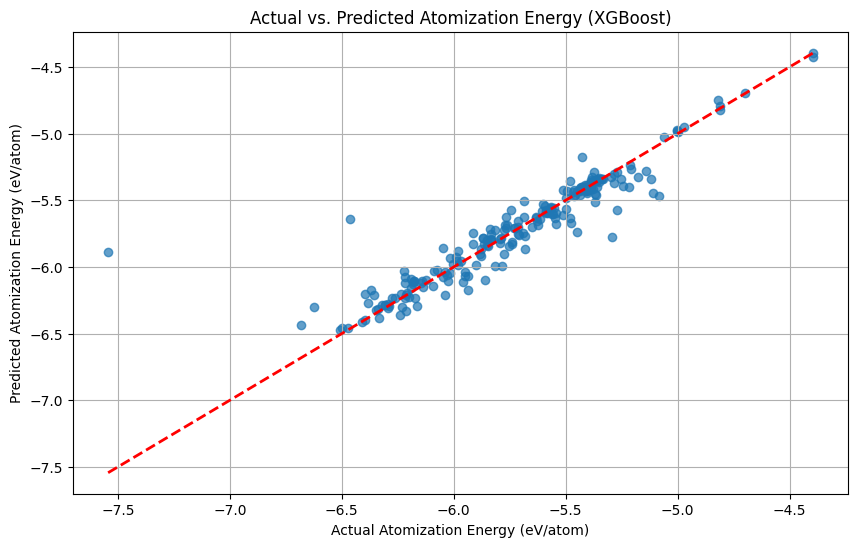

In [36]:
import matplotlib.pyplot as plt

# Scatter plot of actual vs. predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_xgb, alpha=0.7)
plt.xlabel('Actual Atomization Energy (eV/atom)')
plt.ylabel('Predicted Atomization Energy (eV/atom)')
plt.title('Actual vs. Predicted Atomization Energy (XGBoost)')

# Add a line for perfect prediction
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)

plt.grid(True)
plt.show()

In [37]:
y_test

,Atomization energy (eV/atom)
992,-5.21528
746,-4.39744
1067,-5.44824
425,-5.74195
490,-5.72580
...,...
634,-5.87812
486,-5.73127
298,-6.30920
582,-6.18894


In [38]:
y_pred_xgb

array([-5.237079 , -4.393808 , -5.7353034, -5.8097177, -5.7055254,
       -5.2856226, -5.748111 , -6.3020053, -5.4156137, -5.700544 ,
       -4.9525723, -6.075147 , -6.03819  , -5.4329524, -6.2313714,
       -5.827523 , -5.4437904, -5.7063007, -5.3655353, -5.559189 ,
       -5.5692925, -6.033556 , -6.096206 , -5.9834127, -6.319834 ,
       -5.349958 , -5.4296308, -5.8879685, -5.7260265, -5.79452  ,
       -5.83034  , -5.403983 , -5.2913876, -5.724699 , -5.626905 ,
       -5.4268723, -5.987427 , -6.398071 , -6.2345185, -5.3288474,
       -6.413693 , -5.4092264, -5.464426 , -6.2116013, -5.573987 ,
       -5.3941183, -5.5766406, -5.461724 , -5.5818963, -6.0789347,
       -5.8293395, -5.5514917, -5.657404 , -5.779827 , -5.53166  ,
       -5.3469806, -6.228113 , -5.423977 , -5.7632685, -6.2032313,
       -5.774585 , -5.9918547, -5.958185 , -5.842367 , -6.111902 ,
       -5.624186 , -5.781219 , -6.285103 , -6.022328 , -6.4331093,
       -5.3397923, -5.659368 , -5.9571886, -5.4245667, -6.0332